## Задача - улучшение Baseline

### Описание моделей, вариантов экспериментов и результы метрик.


### Модель 1: Наивная модель
1. На этапе постороения "наивной" модели пробовала добавить свои данные из Progect_6, но это ничего не дало, отказалась от использовния своих данных в дальнейшем. 
2. Изменила признак model. В model соединила brand и первые буквенные обозначения из model_info. Так получается меньше пропусков и модель работает лучше.
#### MAPE - 21.33%


### Модель 2: CatBoostRegressor
1. Небольшое улучшение дало укрупнение color. Некоторые цвета типа: фиолетовый, желтый, золотистый переименованы в "редкий цвет".
2. На boxplot виден характер выбросов в mileage. Такие данные заменять на среднее не правильно, для авто это значимый показатель. Разметила на две категории с нормальным пробогом и слишком большим.
3. Аналогично разметила на две группы по показателю "пробег за год". Это тоже хороший показатель при покупке авто.
4. Пустое значение в "объеме двигателя" заменила на среднее значение по двигателям - 2.8.
5. Количественные признаки логарифмируются.
6. Перепробовала разные виды scaler (StandartScaler, RobustScaler, Normalizer), улучшения не получила. Оставила, как есть MinMaxScaler.
7. Модель дала хорошее улучшение метрики.
#### MAPE - 11.13% 


### Модель 3: GradientBoostingRegressor
1. Построила модель градиентного бустинга: Взяла эту модель, так как в прошлой своей работе Progect_6 она была лучшей. Данные схожи, поэтому решила использовать ее и здесь. 
2. Результат хороший, но по сравнению с catboost чуть ниже. 
#### MAPE - 11.89%

### Blend
1. Комбинация catboost и gradientboosting моделей в лоб улучшения метрики не дает, но на Kaggle улучшение есть. Поэтому эту модель оставляю.
#### MAPE - 11.32%.


### Модель 4: Simple Dense NN 
1. Результат оказался достаточно хороший. Комбинирование с catboost дало очень хороший результат.
#### MAPE - 11.64%

### Blend
1. Комбинирование с catboost дало очень хороший результат.
#### MAPE - 10.68% - самый лучший результат



### Model 5: NLP + Multiple Inputs
1. В модели использовала предобработку текста. 
2. Пробовала использовать stemming для обработки текстов, но результат не понравился. Убрала этот вариант. 
3. Составлен pattern с символами, не несущими информации, но сильно засоряющими текст. При помощи метода re.sub текст очищен от этих символов.
4. При помощи метода pymorphy2.MorphAnalyzer, morph.normal_forms текст скорректирован. 
5. Это все дало уменьшение размерa словаря tokenize.word_index с 39 тыс. до 31 тыс. слов.
6. Результат лучше, чем просто нейронная сеть, но чуть хуже, чем catboost.
#### MAPE - 12.08% 


### Blend
1. Пробуем комбинацию моделей catboost, gradientboosting и NLP
2. Лучший результат. 
3. Одинаковую метрику дают как комбинация catboost и NLP, так и всех трех. Оставляю оба варианта.
#### MAPE - 10.80%
#### Kaggle - 11.61031


### Model 6: Добавление картинок
Удалось: загрузить картинки, поизменять картинки, перегнать их в цифру, запустить модель.
Модель работала слишком долго и на каком-то этапе работа остановилась.
Результата нет.
Выводы по данной модели: не буду даже пытаться ее использовать из-за неоправданно высоких временных затратах. На своем компе из-за скачка электроэнергии произошел сброс, на Kaggle есть временное ограничение, да и неинтересно сутками ждать очередной итерации.


### Выводы:
1. Лучшиие результаты MAPE<11 получились комбинацией моделей catboost+NN и catboost+NLP.
2. Наибольший вклад в построение оптимальной модели предстаказания цены вносят простые методы catboost и gradientboosting. Кроме лучших показателей MAPE они еще и быстродейственны и позволяют за ограниченное время сделать больше экспериментов с предобработкой, позволяя искать варианты для улучшений.
3. Модель NN дала хороший результат. В комбинации результат самый оптимальный.
4. Добавление NLP в лоб улучшения не дает. Но в комбинации с предидущими моделями позволяет улучшить метрику. Удалось получить метрику 10.80%.
5. Добавление CV убивает всякую мотивацию использовать CV из-за невозможности получить результат в какие-то понятные строки. Слишком дорогостоящий в плане временных затрат метод. В этой задаче я его отбросила.
6. Если пытаться оценить вклад разных методов в улучшение метрики MAPE, то конечно можно проследить динамику MAPE: от "наивной модели" до простой модели catboost - идет существенное увеличение c 21.33% до примерно 12.5%. За счет дополнительной предобработки удалось улучшить MAPE с 12.5% до 11.13%. NLP дало дополнительное улучшение с 11.13% до 10.80%. Т.е. всего 0.31%. 
7. Применение NLP тоже затратно по времени. Нужно взвешивать целесообразность и временные затраты
8. Применение NN дало улучшение метрики на 0.41%. При этом и по времени работы эта модель предпочтительнее.
9. Итоговый результат на kaggle - 11.61 (55 место).

In [1]:
# установка и импорт библиотек
!pip install -q tensorflow==2.3
!pip install albumentations -q
!pip install pymystem3
! pip install pymorphy2

import random
import numpy as np 
import pandas as pd 
import os
import sys
import PIL
import cv2
import re

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# keras
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import *
import albumentations

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from tqdm import tqdm
import pymorphy2
from string import punctuation
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')

# plt
import matplotlib.pyplot as plt
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\NUC-
[nltk_data]     MARLEY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NUC-
[nltk_data]     MARLEY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# дополнительные бибилиотеки
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)

Python       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Numpy        : 1.18.5
Tensorflow   : 2.3.0


In [4]:
# фиксируем значения
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
x_size = 8
y_size = 5

In [5]:
def mape(y_true, y_pred):
    """функция для определения целевой метрики"""
    return np.mean(np.abs((y_pred-y_true)/y_true))

def getCountPlot(df, feature, x_s=x_size, y_s=y_size):
    """функция для построения каунтпловот для категорийных признаков"""
    plt.figure(figsize=(x_s, y_s))
    sns.countplot(data=df,
            order = df[feature].value_counts().index, 
            y=feature)
    plt.title(f'Распределение значений признака {feature}')
    plt.show;   

In [6]:
!pip freeze > requirements.txt

# DATA

типы признаков:

* bodyType - категориальный
* brand - категориальный
* color - категориальный
* description - текстовый
* engineDisplacement - числовой, представленный как текст
* enginePower - числовой, представленный как текст
* fuelType - категориальный
* mileage - числовой
* modelDate - числовой
* model_info - категориальный
* name - категориальный, желательно сократить размерность
* numberOfDoors - категориальный
* price - числовой, целевой
* productionDate - числовой
* sell_id - изображение (файл доступен по адресу, основанному на sell_id)
* vehicleConfiguration - не используется (комбинация других столбцов)
* vehicleTransmission - категориальный
* Владельцы - категориальный
* Владение - числовой, представленный как текст
* ПТС - категориальный
* Привод - категориальный
* Руль - категориальный

In [7]:
# загружаем данные 
df = pd.read_csv('basa_my.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Model 1: Создадим "наивную" модель 
Эта модель будет предсказывать среднюю цену по модели и году выпуска. 
C ней будем сравнивать другие модели. 
Для построения "наивной" модели укрупняю группы моделей: моделью будет назваться соединение brand и первых самых значимых букв в model_info. В этом случае модель находит все варианты без пропусков и работает.

In [8]:
train_1 = pd.read_csv('train.csv')

In [9]:
# меняем признак модель
train_1['model_info'] = train_1['model_info'].apply(lambda x: x.split('_')[0])
train_1['model'] = train_1['brand']+'_'+train_1['model_info']
train_1['model'].unique()

array(['BMW_5ER', 'AUDI_A6', 'MERCEDES_E', 'AUDI_A5', 'MERCEDES_C',
       'BMW_7ER', 'BMW_3ER', 'BMW_X4', 'MERCEDES_M', 'MERCEDES_S',
       'AUDI_Q5', 'MERCEDES_CLA', 'MERCEDES_GLA', 'BMW_X1', 'AUDI_Q7',
       'BMW_X2', 'BMW_X5', 'MERCEDES_B', 'BMW_X6', 'MERCEDES_VITO',
       'AUDI_A3', 'BMW_1ER', 'MERCEDES_CLS', 'MERCEDES_CL', 'MERCEDES_G',
       'MERCEDES_GLC', 'MERCEDES_GLS', 'AUDI_A8', 'AUDI_A4',
       'MERCEDES_GLE', 'BMW_X3', 'AUDI_Q3', 'BMW_X7', 'BMW_I3',
       'MERCEDES_VIANO', 'MERCEDES_GL', 'MERCEDES_V', 'MERCEDES_SLK',
       'MERCEDES_A', 'AUDI_S7', 'BMW_4', 'AUDI_A7', 'BMW_6ER', 'AUDI_RS6',
       'MERCEDES_GLK', 'MERCEDES_R', 'BMW_Z4', 'AUDI_A1', 'BMW_Z3',
       'MERCEDES_CLK', 'BMW_M6', 'AUDI_ALLROAD', 'MERCEDES_SLS',
       'AUDI_S5', 'BMW_2GRANDTOURER', 'MERCEDES_SL', 'MERCEDES_W124',
       'MERCEDES_SLC', 'AUDI_TT', 'AUDI_S8', 'AUDI_R8', 'BMW_M5',
       'BMW_2ER', 'AUDI_RSQ3', 'AUDI_S4', 'AUDI_Q8', 'MERCEDES_AMG',
       'BMW_M4', 'BMW_Z8', 'MERCEDES_X', 'AU

In [10]:
# split данных
data_train, data_test = train_test_split(train_1, test_size=0.15, shuffle=True, random_state=RANDOM_SEED)

In [11]:
# Наивная модель
predicts = []
for index, row in pd.DataFrame(data_test[['model', 'productionDate']]).iterrows():
    query = f"model == '{row[0]}' & productionDate == {row[1]}"
    predicts.append(data_train.query(query)['price'].median())

# заполним не найденные совпадения
predicts = pd.DataFrame(predicts)
predicts = predicts.fillna(predicts.median())

# округлим
predicts = (predicts // 1000) * 1000

#оцениваем точность
print(f"Точность наивной модели по метрике MAPE: {(mape(data_test['price'], predicts.values[:, 0]))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 21.33%


Точность наивной модели по метрике MAPE: 21.33%

# EDA and preproc

In [12]:
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест
test['price'] = 0 # в тесте у нас нет значения price, мы его должны предсказать, поэтому пока просто заполняем нулями

data = test.append(train, sort=False).reset_index(drop=True) # объединяем
print(train.shape, test.shape, data.shape)

(6682, 23) (1671, 23) (8353, 23)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              8353 non-null   object 
 1   brand                 8353 non-null   object 
 2   color                 8353 non-null   object 
 3   description           8353 non-null   object 
 4   engineDisplacement    8353 non-null   object 
 5   enginePower           8353 non-null   object 
 6   fuelType              8353 non-null   object 
 7   mileage               8353 non-null   int64  
 8   modelDate             8353 non-null   int64  
 9   model_info            8353 non-null   object 
 10  name                  8353 non-null   object 
 11  numberOfDoors         8353 non-null   int64  
 12  productionDate        8353 non-null   int64  
 13  sell_id               8353 non-null   int64  
 14  vehicleConfiguration  8353 non-null   object 
 15  vehicleTransmission  

In [14]:
# взглянем на количество пропусков
data.isnull().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  1
Владение                5418
ПТС                        0
Привод                     0
Руль                       0
sample                     0
price                      0
dtype: int64

In [15]:
# проверим на дубликаты
len(data.drop_duplicates()) - len(data)

0

## Осмотрим признаки

In [16]:
# в прошлой работе вариации с этим признаком результатов не дали, 
# поэтому и здесь оставляю, как есть
data.bodyType.value_counts()

седан                   3541
внедорожник 5 дв.       2896
купе                     543
хэтчбек 5 дв.            364
лифтбек                  299
универсал 5 дв.          196
минивэн                  178
купе-хардтоп             111
родстер                   88
хэтчбек 3 дв.             57
кабриолет                 54
компактвэн                 8
внедорожник 3 дв.          5
лимузин                    5
внедорожник открытый       4
пикап двойная кабина       3
седан 2 дв.                1
Name: bodyType, dtype: int64

In [17]:
# brand
data.brand.value_counts()

BMW         3535
MERCEDES    2846
AUDI        1972
Name: brand, dtype: int64

In [18]:
# color
data.color.value_counts()

чёрный         3468
белый          1607
серый           925
синий           863
серебристый     420
коричневый      386
красный         266
голубой          91
зелёный          86
бежевый          85
фиолетовый       46
пурпурный        38
оранжевый        30
золотистый       24
жёлтый           17
розовый           1
Name: color, dtype: int64

In [19]:
# небольшое укрупнение цвета с приводит к небольшому улучшению
sv = ['пурпурный', 'жёлтый', 'оранжевый',
      'фиолетовый', 'золотистый', 'розовый']
data['color'] = data['color'].apply(lambda x: 'редкий' if x in sv else x)

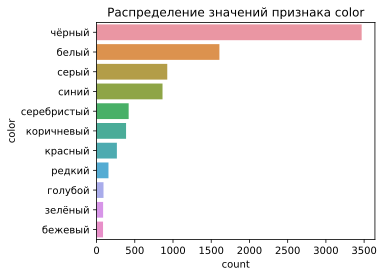

In [20]:
# распределение color после укрупнения
getCountPlot(data,'color', 5, 4)

In [21]:
# engineDisplacement
data.engineDisplacement.unique()

array(['3.0 LTR', '2.5 LTR', '2.0 LTR', '3.5 LTR', '1.8 LTR', '2.2 LTR',
       '5.5 LTR', '4.8 LTR', '1.6 LTR', '4.7 LTR', '4.0 LTR', '1.5 LTR',
       '2.4 LTR', '1.4 LTR', '2.1 LTR', '5.2 LTR', '4.4 LTR', '2.8 LTR',
       '4.2 LTR', '3.2 LTR', '6.0 LTR', '3.7 LTR', '5.0 LTR', '1.2 LTR',
       '3.6 LTR', '2.3 LTR', '6.2 LTR', '1.7 LTR', '1.3 LTR', '5.4 LTR',
       '3.1 LTR', '2.6 LTR', '3.8 LTR', '4.1 LTR', '2.9 LTR', '6.6 LTR',
       '5.9 LTR', 'undefined LTR', '2.7 LTR', '0.7 LTR', '1.9 LTR',
       '4.3 LTR', '5.8 LTR', '4.9 LTR', '3.4 LTR', '6.3 LTR', '5.6 LTR',
       '4.6 LTR'], dtype=object)

In [22]:
# переведем все в цифры
data['engineDisplacement'] = data['engineDisplacement'].astype(str).apply(lambda x: x.split()[0])
# заменим неопределённость на произвольное число 0
data['engineDisplacement'] =  data['engineDisplacement'].replace('undefined', 0.0)
# приведём всё к одному формату
data['engineDisplacement'] = data['engineDisplacement'].astype(float)

In [23]:
# посчитаем средний объема двигателя
data['engineDisplacement'].mean()

2.777445229258943

In [24]:
# заменим 'undefined' на среднее значение 2,8
data['engineDisplacement'] =  data['engineDisplacement'].replace(0, 2.8)

In [25]:
# enginePower
data['enginePower'].unique()

array(['220 N12', '313 N12', '218 N12', '136 N12', '190 N12', '340 N12',
       '245 N12', '316 N12', '170 N12', '160 N12', '231 N12', '388 N12',
       '180 N12', '367 N12', '115 N12', '184 N12', '177 N12', '455 N12',
       '422 N12', '163 N12', '249 N12', '272 N12', '224 N12', '122 N12',
       '557 N12', '333 N12', '306 N12', '156 N12', '150 N12', '264 N12',
       '450 N12', '555 N12', '407 N12', '130 N12', '400 N12', '204 N12',
       '469 N12', '192 N12', '210 N12', '211 N12', '239 N12', '200 N12',
       '350 N12', '420 N12', '300 N12', '381 N12', '265 N12', '258 N12',
       '390 N12', '197 N12', '120 N12', '544 N12', '193 N12', '235 N12',
       '233 N12', '394 N12', '355 N12', '421 N12', '320 N12', '585 N12',
       '105 N12', '280 N12', '194 N12', '132 N12', '639 N12', '250 N12',
       '335 N12', '510 N12', '116 N12', '360 N12', '238 N12', '225 N12',
       '625 N12', '571 N12', '507 N12', '286 N12', '372 N12', '575 N12',
       '408 N12', '310 N12', '354 N12', '255 N12', 

In [26]:
# переведем в цифру
data['enginePower'] = data['enginePower'].str.split().apply(lambda x: x[0]) 
data['enginePower'] = data['enginePower'].apply(lambda x: int(x))

In [27]:
data['enginePower'].value_counts()

184    759
249    655
190    420
245    355
306    344
      ... 
402      1
165      1
329      1
700      1
100      1
Name: enginePower, Length: 154, dtype: int64

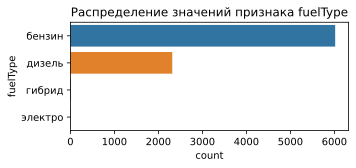

In [28]:
# fuelType
getCountPlot(data,'fuelType', 5, 2)

In [29]:
# model_info
data['model_info'].unique()

array(['W124', '6ER', '3ER', '5ER', 'Q7', 'SL_KLASSE', 'A5', 'A4',
       'GL_KLASSE', 'A6', '1ER', 'X5', 'X3', 'S_KLASSE',
       'S_CLASS_MAYBACH', 'G_KLASSE', 'E_KLASSE', 'X7', 'Q5', 'A3',
       'B_KLASSE', '4', 'CLS_KLASSE_AMG', 'RS3', 'X6', 'C_KLASSE', 'X1',
       'S8', 'Q3', 'X6_M', '7ER', 'GLS_KLASSE', 'A7', 'GLC_KLASSE', 'TT',
       'Q8', 'M3', 'M4', 'C_KLASSE_AMG', 'X4', 'G_KLASSE_AMG', 'VITO',
       'M_KLASSE', 'CLA_KLASSE', 'TTS', 'GLK_KLASSE', 'SLK_KLASSE_AMG',
       'CLS_KLASSE', 'R_KLASSE', 'S_KLASSE_AMG', 'VIANO', 'GLE_KLASSE',
       'S5', 'AMG_GT', 'A8', 'M_KLASSE_AMG', 'A_KLASSE', 'M5', 'X5_M',
       'GLE_KLASSE_COUPE_AMG', 'ALLROAD', 'GLE_KLASSE_COUPE',
       'E_KLASSE_AMG', 'GLA_CLASS', 'SLS_AMG', 'AMG_GLC_COUPE',
       'V_KLASSE', 'GLE_KLASSE_AMG', 'X2', 'A4_ALLROAD', 'CL_KLASSE',
       'SLK_KLASSE', 'CLA_KLASSE_AMG', 'RS5', 'X_KLASSE', 'W123', 'A1',
       'S6', 'M6', 'M1', '2ER', '8ER', 'RS6', 'SL_KLASSE_AMG', 'S7', 'M2',
       'CL_KLASSE_AMG', 'Z4', 'X

In [30]:
# name
data['name'].sample(10)

7399      28i xDrive 2.0 AT (245 л.с.) 4WD
4273          40e 2.0hyb AT (245 л.с.) 4WD
3362     63 AMG Long 5.5 AT (585 л.с.) 4WD
2794               3.0d AMT (245 л.с.) 4WD
5378    525d xDrive 2.0d AT (218 л.с.) 4WD
5902                 4.0 AT (560 л.с.) 4WD
1454    740Li xDrive 3.0 AT (320 л.с.) 4WD
2476                525i 2.5 AT (218 л.с.)
743                 116i 1.6 AT (115 л.с.)
1168          63 AMG 5.5 AT (544 л.с.) 4WD
Name: name, dtype: object

In [31]:
# большинство характеристик упоминаются в других столбцах
# вынесим отсюда пару признаков
data['4wd'] = data['name'].apply(lambda x: 1 if '4WD' in x else 0)
data['xdrive'] = data['name'].apply(lambda x: 1 if 'xDrive' in x else 0)

In [32]:
# и удалим
data.drop(['name'], axis=1, inplace=True)

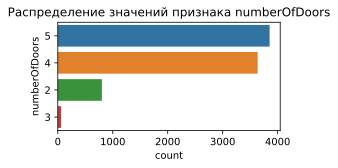

In [33]:
# numberOfDoors
getCountPlot(data,'numberOfDoors', 4, 2)

In [34]:
# vehicleConfiguration
data['vehicleConfiguration'].value_counts()

ALLROAD_5_DOORS AUTOMATIC 3.0       1292
SEDAN AUTOMATIC 2.0                  941
SEDAN AUTOMATIC 3.0                  631
ALLROAD_5_DOORS AUTOMATIC 2.0        524
ALLROAD_5_DOORS ROBOT 2.0            226
                                    ... 
SEDAN AUTOMATIC 2.3                    1
COUPE_HARDTOP AUTOMATIC 3.0            1
CABRIO MECHANICAL 4.9                  1
ROADSTER MECHANICAL 3.2                1
HATCHBACK_5_DOORS MECHANICAL 1.4       1
Name: vehicleConfiguration, Length: 312, dtype: int64

In [35]:
# все параметры упоминаются в других столбцах. удалим
data.drop(['vehicleConfiguration'], axis=1, inplace=True)

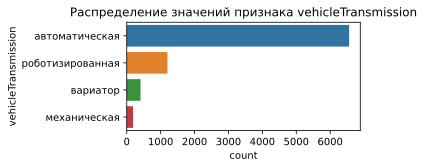

In [36]:
# vehicleTransmission - оставляем
getCountPlot(data,'vehicleTransmission', 4.2, 2)

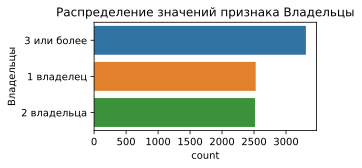

In [37]:
# Владельцы
getCountPlot(data,'Владельцы', 4, 2)

In [38]:
data['Владельцы'].fillna('2 владельца', inplace=True)

In [39]:
# больше половины значений пустые. удалим
data.drop(['Владение'], axis=1, inplace=True)

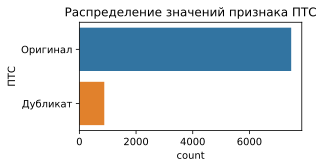

In [40]:
# ПТС - оставляем
getCountPlot(data,'ПТС', 4, 2)

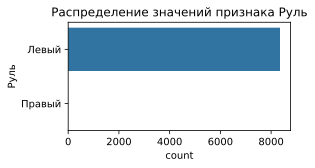

In [41]:
# Руль
getCountPlot(data,'Руль', 4, 2)

In [42]:
# нет вариативности признака. удалим
data.drop(['Руль'], axis=1, inplace=True)

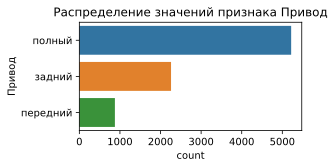

In [43]:
# Привод - оставляем
getCountPlot(data,'Привод', 4, 2)

In [44]:
# добавим призанки 
# лет в использовании
data['years_in_use'] = 2021 - data['productionDate']
# количество пробега за год
data['mileage_per_year'] = data['mileage'] / data['years_in_use']

In [45]:
data.describe()

,engineDisplacement,enginePower,mileage,modelDate,numberOfDoors,productionDate,sell_id,sample,price,4wd,xdrive,years_in_use,mileage_per_year
count,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8.353000e+03,8353.000000,8.353000e+03,8353.000000,8353.000000,8353.000000,8353.000000
mean,2.779456,255.560038,120362.983479,2010.103556,4.262062,2012.010775,1.096591e+09,0.799952,1.519804e+06,0.624686,0.112415,8.989225,13284.467922
std,1.055636,108.883844,81856.639133,5.436914,0.885531,5.107314,2.657545e+07,0.400060,1.873130e+06,0.484233,0.315895,5.107314,6651.858456
min,0.700000,75.000000,1.000000,1971.000000,2.000000,1982.000000,3.421294e+07,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.333333
25%,2.000000,184.000000,59246.000000,2007.000000,4.000000,2009.000000,1.097086e+09,1.000000,4.600000e+05,0.000000,0.000000,5.000000,8909.090909
50%,2.800000,231.000000,110384.000000,2011.000000,4.000000,2013.000000,1.099407e+09,1.000000,1.030000e+06,1.000000,0.000000,8.000000,12857.142857
75%,3.000000,306.000000,167084.000000,2014.000000,5.000000,2016.000000,1.099975e+09,1.000000,1.900000e+06,1.000000,0.000000,12.000000,17000.000000
max,6.600000,700.000000,1000000.000000,2019.000000,5.000000,2020.000000,1.100273e+09,1.000000,2.390000e+07,1.000000,1.000000,39.000000,76923.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

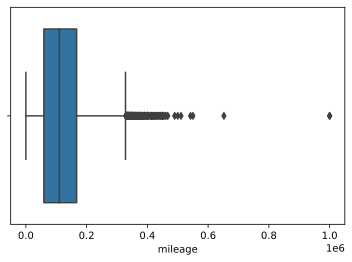

In [46]:
# визуально очень большой разброс у показателя пробег
sns.boxplot(data.mileage)

In [47]:
# разделим пробег на две категории по границе пробега
data['big_mileage'] = data['mileage'].apply(lambda x: 'да' if x > 300000 else 'нет')

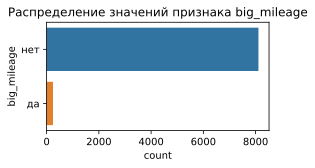

In [48]:
# посмотрим новый признак
getCountPlot(data,'big_mileage', 4, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage_per_year'>

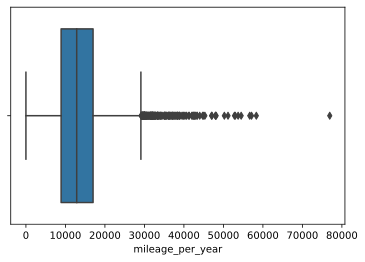

In [49]:
# также визуально очень различаются показатели mileage_per_year
sns.boxplot(data.mileage_per_year)

In [50]:
# данный показатель говорит о способе эксплуатации 
# граница выброса где-то около 25000
# разделим автомобили по категориям: нормальная эксплуатация и экстремальная
data['mileage_year_big'] = data['mileage_per_year'].apply(lambda x: 'да' if x > 25000 else 'нет')

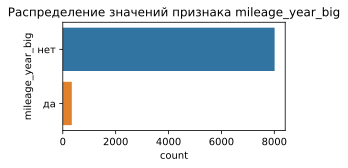

In [51]:
# посмотрим новый признак
getCountPlot(data,'mileage_year_big', 4, 2)

In [52]:
#создали список категориальных
categorical_features = ['bodyType', 'brand', 'color', 'fuelType', 'model_info', '4wd', 'xdrive', 'numberOfDoors',
                        'vehicleTransmission', 'Владельцы', 'ПТС', 'Привод','big_mileage','mileage_year_big']

#cоздали список числовых признаков
numerical_features = ['productionDate','modelDate', 'mileage',
                     'years_in_use', 'mileage_per_year', 'enginePower', 'engineDisplacement']

In [53]:
data[numerical_features].describe()

,productionDate,modelDate,mileage,years_in_use,mileage_per_year,enginePower,engineDisplacement
count,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000
mean,2012.010775,2010.103556,120362.983479,8.989225,13284.467922,255.560038,2.779456
std,5.107314,5.436914,81856.639133,5.107314,6651.858456,108.883844,1.055636
min,1982.000000,1971.000000,1.000000,1.000000,0.333333,75.000000,0.700000
25%,2009.000000,2007.000000,59246.000000,5.000000,8909.090909,184.000000,2.000000
50%,2013.000000,2011.000000,110384.000000,8.000000,12857.142857,231.000000,2.800000
75%,2016.000000,2014.000000,167084.000000,12.000000,17000.000000,306.000000,3.000000
max,2020.000000,2019.000000,1000000.000000,39.000000,76923.000000,700.000000,6.600000


In [54]:
#логарифмируем числовые признаки
for col in data[numerical_features]:
    data[col] = data[col].apply(lambda x: np.log(x) if x > 0 else x)

In [55]:
data[numerical_features].describe()

,productionDate,modelDate,mileage,years_in_use,mileage_per_year,enginePower,engineDisplacement
count,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000
mean,7.606887,7.605938,11.302349,2.020481,9.281867,5.466668,0.958241
std,0.002542,0.002710,1.297946,0.633154,0.948124,0.380795,0.350412
min,7.591862,7.586296,0.000000,0.000000,-1.098612,4.317488,-0.356675
25%,7.605392,7.604396,10.989454,1.609438,9.094827,5.214936,0.693147
50%,7.607381,7.606387,11.611720,2.079442,9.461655,5.442418,1.029619
75%,7.608871,7.607878,12.026252,2.484907,9.740969,5.723585,1.098612
max,7.610853,7.610358,13.815511,3.663562,11.250560,6.551080,1.887070


In [56]:
data.isnull().sum() # пробелов нет

bodyType               0
brand                  0
color                  0
description            0
engineDisplacement     0
enginePower            0
fuelType               0
mileage                0
modelDate              0
model_info             0
numberOfDoors          0
productionDate         0
sell_id                0
vehicleTransmission    0
Владельцы              0
ПТС                    0
Привод                 0
sample                 0
price                  0
4wd                    0
xdrive                 0
years_in_use           0
mileage_per_year       0
big_mileage            0
mileage_year_big       0
dtype: int64

In [57]:
def preproc_data(df_input):
    '''функция для удаления лишний признаков, энкодингов'''
    
    df_output = df_input.copy()
    
    # убираем не нужные для модели признаки
    df_output.drop(['description','sell_id'], axis = 1, inplace=True)
           
    # Нормализация данных
    scaler = MinMaxScaler()
    for column in numerical_features:
        df_output[column] = scaler.fit_transform(df_output[[column]])[:,0]
    
    # Label Encoding
    for column in categorical_features:
        df_output[column] = df_output[column].astype('category').cat.codes
        
    # One-Hot Encoding
    df_output = pd.get_dummies(df_output, columns=categorical_features, dummy_na=False)
    
    
    return df_output

# Запускаем и проверяем, что получилось
df_preproc = preproc_data(data)
df_preproc.sample(10)

,engineDisplacement,enginePower,mileage,modelDate,productionDate,sample,price,years_in_use,mileage_per_year,bodyType_0,...,Владельцы_3,ПТС_0,ПТС_1,Привод_0,Привод_1,Привод_2,big_mileage_0,big_mileage_1,mileage_year_big_0,mileage_year_big_1
3640,0.467888,0.439126,0.891384,0.772949,0.686257,1,630000.0,0.700125,0.878487,0,...,0,0,1,0,0,1,0,1,0,1
6421,0.467888,0.310328,0.866257,0.793642,0.791046,1,680000.0,0.599751,0.880154,0,...,0,0,1,1,0,0,0,1,0,1
7645,0.420931,0.339223,0.829621,0.752247,0.712474,1,599000.0,0.678276,0.815871,0,...,0,0,1,0,1,0,0,1,0,1
7222,0.467888,0.529985,0.757345,0.917580,0.895627,1,2150000.0,0.439310,0.805906,0,...,0,0,1,0,0,1,0,1,0,1
4604,0.648598,0.553132,0.852324,0.793642,0.791046,1,1290000.0,0.599751,0.864566,0,...,0,0,1,0,0,1,0,1,0,1
5140,0.275896,0.310328,0.673618,0.979410,0.973926,1,1898000.0,0.189200,0.786437,0,...,0,0,1,0,1,0,0,1,0,1
728,0.420931,0.339223,0.866900,0.752247,0.764868,0,0.0,0.628510,0.872341,0,...,1,0,1,0,1,0,0,1,0,1
7029,0.567340,0.477709,0.830379,0.648579,0.633785,1,675000.0,0.739185,0.798650,0,...,0,0,1,1,0,0,0,1,0,1
1997,0.648598,0.629523,0.893054,0.752247,0.712474,1,970000.0,0.678276,0.886837,0,...,1,0,1,0,0,1,0,1,0,1
3433,0.467888,0.463097,0.867353,0.834995,0.791046,1,890000.0,0.599751,0.881380,0,...,1,0,1,0,0,1,0,1,0,1


In [58]:
# логарифмируем целевую переменную
df_preproc['price'] = data['price'].apply(lambda x: np.log(x) if x > 0 else x)

### Split data

In [59]:
# отделяем test от train
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.price.values     # наш таргет
X = train_data.drop(['price'], axis=1)
X_sub = test_data.drop(['price'], axis=1)

# Модель CatBoostRegressor

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=RANDOM_SEED)

In [61]:
X_train.head()

,engineDisplacement,enginePower,mileage,modelDate,productionDate,years_in_use,mileage_per_year,bodyType_0,bodyType_1,bodyType_2,...,Владельцы_3,ПТС_0,ПТС_1,Привод_0,Привод_1,Привод_2,big_mileage_0,big_mileage_1,mileage_year_big_0,mileage_year_big_1
7320,0.957522,0.887119,0.862682,0.772949,0.764868,0.628510,0.867622,0,0,0,...,0,0,1,1,0,0,0,1,0,1
8037,0.467888,0.529985,0.720170,0.938200,0.947839,0.299875,0.805682,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4681,0.663211,0.547896,0.854462,0.690077,0.633785,0.739185,0.825593,0,0,0,...,1,0,1,0,0,1,0,1,0,1
6014,0.420931,0.401796,0.919752,0.731534,0.660028,0.720353,0.904223,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3649,0.648598,0.639649,0.850062,0.834995,0.817211,0.567601,0.871573,0,0,0,...,0,0,1,0,0,1,0,1,0,1


In [62]:
model = CatBoostRegressor(iterations = 5000,
                          #depth=10,
                          #learning_rate = 0.5,
                          random_seed = RANDOM_SEED,
                          eval_metric = 'MAPE',
                          custom_metric = ['RMSE', 'MAE'],
                          od_wait = 500,
                          #task_type='GPU',
                         )
model.fit(X_train, y_train,
         eval_set = (X_test, y_test),
         verbose_eval = 100,
         use_best_model = True,
         #plot=True
         )

Learning rate set to 0.025058
0:	learn: 0.0418333	test: 0.0418783	best: 0.0418783 (0)	total: 138ms	remaining: 11m 31s
100:	learn: 0.0126054	test: 0.0122558	best: 0.0122558 (100)	total: 423ms	remaining: 20.5s
200:	learn: 0.0102969	test: 0.0100131	best: 0.0100125 (199)	total: 684ms	remaining: 16.3s
300:	learn: 0.0096861	test: 0.0095088	best: 0.0095088 (300)	total: 937ms	remaining: 14.6s
400:	learn: 0.0093003	test: 0.0092054	best: 0.0092054 (400)	total: 1.2s	remaining: 13.8s
500:	learn: 0.0089492	test: 0.0089725	best: 0.0089725 (500)	total: 1.44s	remaining: 12.9s
600:	learn: 0.0085902	test: 0.0087182	best: 0.0087182 (600)	total: 1.68s	remaining: 12.3s
700:	learn: 0.0083078	test: 0.0085243	best: 0.0085241 (699)	total: 1.93s	remaining: 11.8s
800:	learn: 0.0080902	test: 0.0084042	best: 0.0084042 (797)	total: 2.16s	remaining: 11.3s
900:	learn: 0.0078883	test: 0.0082907	best: 0.0082907 (900)	total: 2.4s	remaining: 10.9s
1000:	learn: 0.0077173	test: 0.0082113	best: 0.0082113 (1000)	total: 2.65s

In [63]:
test_predict_catboost = model.predict(X_test)
predict_ctb=np.exp(test_predict_catboost)
print(f"TEST mape: {(mape(np.exp(y_test), predict_ctb))*100:0.2f}%")

TEST mape: 11.13%


TEST mape: 11.13%

### Submission

In [64]:
sub_predict_catboost = model.predict(X_sub)
sample_submission['price'] = np.exp(sub_predict_catboost)
sample_submission.to_csv('catboost_submission.csv', index=False)

# Модель GradientBoostingRegressor

In [65]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start=100, stop=400, num=8)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(5, 15, num=6)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 7}

In [66]:
best_gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, n_estimators=400,
                                     min_samples_split=5, min_samples_leaf=4, max_features='sqrt', max_depth=7)

In [67]:
best_gbr.fit(X_train, y_train)
predict_gbr = np.exp(best_gbr.predict(X_test))

In [68]:
print(f"TEST mape: {(mape(np.exp(y_test), predict_gbr))*100:0.2f}%")

TEST mape: 11.89%


TEST mape: 11.89% 

In [69]:
comb1=(predict_gbr+predict_ctb)/2
print(f"TEST mape: {(mape(np.exp(y_test), comb1))*100:0.2f}%")

TEST mape: 11.32%


TEST mape: 11.32%

### Submission

In [70]:
sub_predict_gbr = best_gbr.predict(X_sub)
sample_submission['price'] = np.exp(sub_predict_gbr)
sample_submission.to_csv('gbr_submission.csv', index=False)

# Модель Tabular NN

Построим обычную сеть:

## Simple Dense NN

In [71]:
model = Sequential()
model.add(L.Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(L.Dropout(0.5))
model.add(L.Dense(256, activation="relu"))
model.add(L.Dropout(0.5))
model.add(L.Dense(1, activation="linear"))

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               97280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 228,865
Trainable params: 228,865
Non-trainable params: 0
_________________________________________________________________


In [73]:
all_preds = []
all_subs = []
#tf.keras.backend.set_floatx('float64')

for i in range(10):
    model = Sequential([
        L.Dense(1000, 'relu'),
        L.Dropout(0.6),
        L.Dense(1000, 'relu'),
        L.Dropout(0.6),
        L.Dense(1)
    ])

    model.compile(loss='mape', optimizer=Adam(1e-2))
    model.fit(X_train, np.exp(y_train), batch_size=256, epochs=500,
              validation_data=(X_test, np.exp(y_test)), verbose=0,
              callbacks=[
                  EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True),
                  ReduceLROnPlateau(monitor='val_loss', patience=40, factor=0.1)
              ])

    preds = model.predict(X_test)[:,0]
    print(mape(np.exp(y_test), preds)*100)
    all_preds.append(preds)
    all_subs.append(model.predict(X_sub))

print(mape(np.exp(y_test), np.array(all_preds).mean(axis=0))*100)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11.692948877068982

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor

In [74]:
print(f"TEST mape: {(mape(np.exp(y_test), np.array(all_preds).mean(axis=0)))*100:0.2f}%")

TEST mape: 11.64%


### Blend

In [75]:
predict_nn1=np.array(all_preds).mean(axis=0)
comb_nn1=(predict_ctb+predict_nn1)/2
print(f"TEST mape: {(mape(np.exp(y_test), comb_nn1))*100:0.2f}%")

TEST mape: 10.68%


TEST mape: 10.68%

### Submission

In [76]:
#sub_predict_nn1 = model.predict(X_sub)
sample_submission['price'] = np.array(all_subs).mean(axis=0)
sample_submission.to_csv('nn1_submission.csv', index=False)

In [77]:
sub_predict_nn1=np.array(all_subs).mean(axis=0)
sample_submission['price'] = (np.exp(sub_predict_catboost)+sub_predict_nn1)/2
sample_submission.to_csv('nn1_cbt_submission.csv', index=False)

# Модель NLP + Multiple Inputs

In [ ]:
data.description

In [ ]:
def pos(word, morth=pymorphy2.MorphAnalyzer()):
    "Return a likely part of speech for the *word*."""
    return morth.parse(word)[0].tag.POS
functors_pos = {'INTJ', 'CONJ', 'PREP'} 
# служебные слова INTJ - междометия
# CONJ - союз
# PREP - предлог

In [ ]:
data.description = data.description.apply(lambda x: " ".join([word for word in x.split() if pos(word) not in functors_pos]))

In [ ]:
data['description'][0]

In [ ]:
morph = pymorphy2.MorphAnalyzer()
df_NLP = data.copy()

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+●•✅☑️☛"

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        token = token.strip()
        token = morph.normal_forms(token)[0]
        tokens.append(token)
    return ' '.join(tokens)

In [ ]:
data['description'] = df_NLP.apply(
    lambda df_NLP: lemmatize(df_NLP.description), axis=1)

In [ ]:
df_preproc.description_preproc=data.description

In [ ]:
# TOKENIZER
# максимальное количество слов использовано
MAX_WORDS = 100000
# максимальное количество слов в строке
MAX_SEQUENCE_LENGTH = 256

In [ ]:
#%%time
tokenize = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n•–∙—″☑️✔➥●·✅☛———————————————————————————')
tokenize.fit_on_texts(df_preproc.description_preproc)
tokenize.word_index

In [ ]:
len(tokenize.word_index)

In [ ]:
# split данных
text_train = df_preproc.description_preproc.iloc[X_train.index]
text_test = df_preproc.description_preproc.iloc[X_test.index]
text_sub = df_preproc.description_preproc.iloc[X_sub.index]

# %%time
text_train_sequences = sequence.pad_sequences(tokenize.texts_to_sequences(text_train), maxlen=MAX_SEQUENCE_LENGTH)
text_test_sequences = sequence.pad_sequences(tokenize.texts_to_sequences(text_test), maxlen=MAX_SEQUENCE_LENGTH)
text_sub_sequences = sequence.pad_sequences(tokenize.texts_to_sequences(text_sub), maxlen=MAX_SEQUENCE_LENGTH)

print(text_train_sequences.shape, text_test_sequences.shape, text_sub_sequences.shape, )

In [ ]:
# вот так теперь выглядит наш текст
print(text_train.iloc[6])
print(text_train_sequences[6])

### RNN NLP

In [ ]:
model_nlp = Sequential()
model_nlp.add(L.Input(shape=MAX_SEQUENCE_LENGTH, name="seq_description"))
model_nlp.add(L.Embedding(len(tokenize.word_index)+1, MAX_SEQUENCE_LENGTH,))
model_nlp.add(L.LSTM(256, return_sequences=True))
model_nlp.add(L.Dropout(0.5))
model_nlp.add(L.LSTM(128,))
model_nlp.add(L.Dropout(0.25))
model_nlp.add(L.Dense(64, activation="relu"))
model_nlp.add(L.Dropout(0.25))

### MLP

In [ ]:
model_mlp = Sequential()
model_mlp.add(L.Dense(512, input_dim=X_train.shape[1], activation="relu"))
model_mlp.add(L.Dropout(0.5))
model_mlp.add(L.Dense(256, activation="relu"))
model_mlp.add(L.Dropout(0.5))

### Multiple Inputs NN

In [ ]:
combinedInput = L.concatenate([model_nlp.output, model_mlp.output])
# being our regression head
head = L.Dense(64, activation="relu")(combinedInput)
head = L.Dense(1, activation="linear")(head)

model = Model(inputs=[model_nlp.input, model_mlp.input], outputs=head)

In [ ]:
#model.summary()

### Fit

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

In [ ]:
checkpoint = ModelCheckpoint('c:/Users/NUC-MARLEY/models/best_model.hdf5', monitor=['val_MAPE'], verbose=0, mode='min')
earlystop = EarlyStopping(monitor='val_MAPE', patience=10, restore_best_weights=True,)
callbacks_list = [checkpoint, earlystop]

In [ ]:
history = model.fit([text_train_sequences, X_train], np.exp(y_train),
                    batch_size=512,
                    epochs=500, # фактически мы обучаем пока EarlyStopping не остановит обучение
                    validation_data=([text_test_sequences, X_test], np.exp(y_test)),
                    callbacks= callbacks_list)

In [ ]:
plt.title('Loss')
plt.plot(history.history['MAPE'], label='train', color='green')
plt.plot(history.history['val_MAPE'], label='test')
plt.show();

In [ ]:
model.load_weights('c:/Users/NUC-MARLEY/models/best_model.hdf5')
model.save('c:/Users/NUC-MARLEY/models/nn_mlp_nlp.hdf5')

In [ ]:
test_predict_nn2 = model.predict([text_test_sequences, (X_test)])
print(f"TEST mape: {(mape(np.exp(y_test), test_predict_nn2[:,0]))*100:0.2f}%")

MAPE: 12.03%

In [ ]:
test_predict_nn2 = model.predict([text_test_sequences, (X_test)])
print(f"TEST mape: {(mape(np.exp(y_test), test_predict_nn2[:,0]))*100:0.2f}%")

In [ ]:
sub_predict_nn2 = model.predict([text_sub_sequences, X_sub])
sample_submission['price'] = sub_predict_nn2[:,0]
sample_submission.to_csv('nn2_submission.csv', index=False)

### Submission

In [ ]:
# проверим в соревновании
sub_predict_nn2 = model.predict([text_sub_sequences, X_sub])
sample_submission['price'] = (sub_predict_nn2[:,0]+np.exp(sub_predict_catboost))/2
sample_submission.to_csv('comb5_submission.csv', index=False)

### Blend

In [ ]:
comb2=(predict_ctb+test_predict_nn2[:,0])/2

In [ ]:
print(f"TEST mape: {(mape(np.exp(y_test), comb2))*100:0.2f}%")

In [ ]:
comb3=(predict_ctb+predict_gbr+test_predict_nn2[:,0])/3

In [ ]:
print(f"TEST mape: {(mape(np.exp(y_test), comb3))*100:0.2f}%")

In [ ]:
# проверим в соревновании
sub_predict_nn2 = model.predict([text_sub_sequences, X_sub])
sample_submission['price'] = (sub_predict_nn2[:,0]+np.exp(sub_predict_catboost)+np.exp(sub_predict_gbr))/3
sample_submission.to_csv('comb6_submission.csv', index=False)

# Модель с использованием картинок

In [ ]:
# убедимся, что цены и фото подгрузились верно
plt.figure(figsize = (12,8))

random_image = train.sample(n = 9)
random_image_paths = random_image['sell_id'].values
random_image_cat = random_image['price'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open('c:/Users/NUC-MARLEY/models/img/img/' + str(path) + '.jpg')
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('price: ' + str(random_image_cat[index]))
    plt.axis('off')
plt.show()

In [ ]:
size = (320, 240)

def get_image_array(index):
    images_train = []
    for index, sell_id in enumerate(data['sell_id'].iloc[index].values):
        image = cv2.imread('c:/Users/NUC-MARLEY/models/img/img/' + str(sell_id) + '.jpg')
        
        assert(image is not None)
        image = cv2.resize(image, size)
        images_train.append(image)
    images_train = np.array(images_train)
    print('images shape', images_train.shape, 'dtype', images_train.dtype)
    return(images_train)


In [ ]:
images_train = get_image_array(X_train.index)
images_test = get_image_array(X_test.index)
images_sub = get_image_array(X_sub.index)

In [ ]:
id=data.sell_id[0]
id

In [ ]:
# разбираемся как прочитать картинку по кусочкам
plt.figure(figsize = (4,4))
im = PIL.Image.open('c:/Users/NUC-MARLEY/models/img/img/' + str(id) + '.jpg')
plt.imshow(im)
plt.title('id ' + str(id))
plt.axis('off')
plt.show()

In [ ]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)


#пример взят из официальной документации: https://albumentations.readthedocs.io/en/latest/examples.html
augmentation = Compose([
    HorizontalFlip(),
    OneOf([
        IAAAdditiveGaussianNoise(),
        GaussNoise(),
    ], p=0.2),
    OneOf([
        MotionBlur(p=0.2),
        MedianBlur(blur_limit=3, p=0.1),
        Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=1),
    OneOf([
        OpticalDistortion(p=0.3),
        GridDistortion(p=0.1),
        IAAPiecewiseAffine(p=0.3),
    ], p=0.2),
    OneOf([
        CLAHE(clip_limit=2),
        IAASharpen(),
        IAAEmboss(),
        RandomBrightnessContrast(),
    ], p=0.3),
    HueSaturationValue(p=0.3),
], p=1)

#пример
plt.figure(figsize = (12,8))
for i in range(9):
    img = augmentation(image = images_train[0])['image']
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
def make_augmentations(images):
    print('применение аугментаций', end = '')
    augmented_images = np.empty(images.shape)
    for i in range(images.shape[0]):
        if i % 200 == 0:
            print('.', end = '')
        augment_dict = augmentation(image = images[i])
        augmented_image = augment_dict['image']
        augmented_images[i] = augmented_image
    print('')
    return augmented_images

In [ ]:
# TOKENIZER
# максимальное количество слов использовано
MAX_WORDS = 100000
# максимальное количество слов в строке
MAX_SEQUENCE_LENGTH = 256

# Лемматизируем и удалим стоп слова
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

def preprocess_text(text):
    """функция для предобработки текста"""
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
             and token != " " \
             and token.strip() not in punctuation]
    text = " ".join(tokens)

    return text

#df_preproc['description_preproc'] = data['description'].apply(preprocess_text)
df_preproc['description_preproc'] = data['description']


# split данных
#text_train = df_preproc.description_preproc.iloc[X_train.index]
#text_test = df_preproc.description_preproc.iloc[X_test.index]
#text_sub = df_preproc.description_preproc.iloc[X_sub.index]

#%%time
tokenize = Tokenizer(num_words=MAX_WORDS)
tokenize.fit_on_texts(df_preproc.description_preproc)
#tokenize.word_index



Качество модели после препроцессинга description, стало хуже

In [ ]:
def process_image(image):
    return augmentation(image = image.numpy())['image']

def tokenize_(descriptions):
    return sequence.pad_sequences(tokenize.texts_to_sequences(descriptions), maxlen = MAX_SEQUENCE_LENGTH)

def tokenize_text(text):
    return tokenize_([text.numpy().decode('utf-8')])[0]

def tf_process_train_dataset_element(image, table_data, text, price):
    im_shape = image.shape
    [image,] = tf.py_function(process_image, [image], [tf.uint8])
    image.set_shape(im_shape)
    [text,] = tf.py_function(tokenize_text, [text], [tf.int32])
    return (image, table_data, text), price

def tf_process_val_dataset_element(image, table_data, text, price):
    [text,] = tf.py_function(tokenize_text, [text], [tf.int32])
    return (image, table_data, text), price

train_dataset = tf.data.Dataset.from_tensor_slices((
    images_train, X_train, df_preproc['description_preproc'].iloc[X_train.index], np.exp(y_train)
    )).map(tf_process_train_dataset_element)

test_dataset = tf.data.Dataset.from_tensor_slices((
    images_test, X_test, df_preproc['description_preproc'].iloc[X_test.index], np.exp(y_test)
    )).map(tf_process_val_dataset_element)
y_sub = np.zeros(len(X_sub))
sub_dataset = tf.data.Dataset.from_tensor_slices((
    images_sub, X_sub, df_preproc['description_preproc'][X_sub.index], y_sub
    )).map(tf_process_val_dataset_element)

#проверяем, что нет ошибок (не будет выброшено исключение):
train_dataset.__iter__().__next__();
test_dataset.__iter__().__next__();
sub_dataset.__iter__().__next__();

In [ ]:
# Строим сверточную сеть для анализа изображений без "головы"
#нормализация включена в состав модели EfficientNetB3, поэтому на вход она принимает данные типа uint8
efficientnet_model = tf.keras.applications.efficientnet.EfficientNetB3(weights = 'imagenet', include_top = False, input_shape = (size[1], size[0], 3))
efficientnet_output = L.GlobalAveragePooling2D()(efficientnet_model.output)

In [ ]:
#строим нейросеть для анализа табличных данных
tabular_model = Sequential([
    L.Input(shape = X.shape[1]),
    L.Dense(512, activation = 'relu'),
    L.Dropout(0.5),
    L.Dense(256, activation = 'relu'),
    L.Dropout(0.5),
    ])

In [ ]:
# NLP
nlp_model = Sequential([
    L.Input(shape=MAX_SEQUENCE_LENGTH, name="seq_description"),
    L.Embedding(len(tokenize.word_index)+1, MAX_SEQUENCE_LENGTH,),
    L.LSTM(256, return_sequences=True),
    L.Dropout(0.5),
    L.LSTM(128),
    L.Dropout(0.25),
    L.Dense(64),
    ])

In [ ]:
#объединяем выходы трех нейросетей
combinedInput = L.concatenate([efficientnet_output, tabular_model.output, nlp_model.output])

# being our regression head
head = L.Dense(256, activation="relu")(combinedInput)
head = L.Dense(1,)(head)

model = Model(inputs=[efficientnet_model.input, tabular_model.input, nlp_model.input], outputs=head)
#model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.005)
model.compile(loss='MAPE',optimizer=optimizer, metrics=['MAPE'])

In [ ]:
checkpoint = ModelCheckpoint('c:/Users/NUC-MARLEY/models/best_model.hdf5', monitor=['val_MAPE'], verbose=0, mode='min')
earlystop = EarlyStopping(monitor='val_MAPE', patience=10, restore_best_weights=True,)
callbacks_list = [checkpoint, earlystop]

In [ ]:
history = model.fit(train_dataset.batch(30),
                    epochs=100,
                    validation_data = test_dataset.batch(30),
                    callbacks=callbacks_list)

Epoch 1/100
190/190 [==============================] - 3530s 19s/step - loss: 54.6807 - MAPE: 54.6807 - val_loss: 37.1185 - val_MAPE: 37.1185
Epoch 2/100
190/190 [==============================] - 3477s 18s/step - loss: 34.6439 - MAPE: 34.6439 - val_loss: 32.4528 - val_MAPE: 32.4528
Epoch 3/100
190/190 [==============================] - 3772s 20s/step - loss: 30.2812 - MAPE: 30.2812 - val_loss: 26.5426 - val_MAPE: 26.5426
Epoch 4/100
190/190 [==============================] - 3686s 19s/step - loss: 25.0442 - MAPE: 25.0442 - val_loss: 22.7906 - val_MAPE: 22.7906
Epoch 5/100
190/190 [==============================] - 3545s 19s/step - loss: 21.5675 - MAPE: 21.5675 - val_loss: 18.1211 - val_MAPE: 18.1211
Epoch 6/100
190/190 [==============================] - 3497s 18s/step - loss: 19.1038 - MAPE: 19.1038 - val_loss: 15.9817 - val_MAPE: 15.9817
Epoch 7/100
190/190 [==============================] - 3555s 19s/step - loss: 18.0548 - MAPE: 18.0548 - val_loss: 15.8920 - val_MAPE: 15.8920
Epoch 8/100
190/190 [==============================] - 3462s 18s/step - loss: 16.7953 - MAPE: 16.7953 - val_loss: 14.3372 - val_MAPE: 14.3372
Epoch 9/100
190/190 [==============================] - 3648s 19s/step - loss: 16.2000 - MAPE: 16.2000 - val_loss: 14.0798 - val_MAPE: 14.0798
Epoch 10/100
190/190 [==============================] - 3529s 19s/step - loss: 16.1171 - MAPE: 16.1171 - val_loss: 13.9607 - val_MAPE: 13.9607
Epoch 11/100
190/190 [==============================] - 3447s 18s/step - loss: 15.4892 - MAPE: 15.4892 - val_loss: 13.6977 - val_MAPE: 13.6977
Epoch 12/100
190/190 [==============================] - 5818s 31s/step - loss: 15.2178 - MAPE: 15.2178 - val_loss: 13.4380 - val_MAPE: 13.4380
Epoch 13/100
190/190 [==============================] - 3541s 19s/step - loss: 15.2149 - MAPE: 15.2149 - val_loss: 14.8112 - val_MAPE: 14.8112
Epoch 14/100
190/190 [==============================] - 3451s 18s/step - loss: 14.9969 - MAPE: 14.9969 - val_loss: 13.3776 - val_MAPE: 13.3776
Epoch 15/100
190/190 [==============================] - 3581s 19s/step - loss: 14.9810 - MAPE: 14.9810 - val_loss: 13.6092 - val_MAPE: 13.6092
Epoch 16/100
190/190 [==============================] - 3453s 18s/step - loss: 14.9745 - MAPE: 14.9745 - val_loss: 13.3931 - val_MAPE: 13.3931
Epoch 17/100
190/190 [==============================] - 6875s 36s/step - loss: 14.6338 - MAPE: 14.6338 - val_loss: 13.3142 - val_MAPE: 13.3142
Epoch 18/100
190/190 [==============================] - 3589s 19s/step - loss: 14.5579 - MAPE: 14.5579 - val_loss: 13.6456 - val_MAPE: 13.6456
Epoch 19/100
190/190 [==============================] - 3548s 19s/step - loss: 14.4786 - MAPE: 14.4786 - val_loss: 13.0259 - val_MAPE: 13.0259
Epoch 20/100
190/190 [==============================] - 3458s 18s/step - loss: 14.4371 - MAPE: 14.4371 - val_loss: 13.3301 - val_MAPE: 13.3301
Epoch 21/100
 63/190 [========>.....................] - ETA: 18:29:51 - loss: 14.5781 - MAPE: 14.5781

In [ ]:
plt.title('Loss')
plt.plot(history.history['MAPE'], label='train')
plt.plot(history.history['val_MAPE'], label='test')
plt.show();

In [ ]:
model.load_weights('c:/Users/NUC-MARLEY/models/best_model.hdf5')
model.save('c:/Users/NUC-MARLEY/models/best_model.hdf5')

In [ ]:
test_predict_nn3 = model.predict(test_dataset.batch(30))
print(f"TEST mape: {(mape(np.exp(y_test), test_predict_nn3[:,0]))*100:0.2f}%")

TEST mape: 


### Submission

In [ ]:
sub_predict_nn3 = model.predict(sub_dataset.batch(30))
sample_submission['price'] = sub_predict_nn3[:,0]
sample_submission.to_csv('nn3_submission.csv', index=False)

### Blend

In [ ]:
blend_predict = (np.exp(test_predict_catboost) + test_predict_nn3[:,0]) / 2
print(f"TEST mape: {(mape(np.exp(y_test), blend_predict))*100:0.2f}%")

TEST mape: 

In [ ]:
blend_sub_predict = (np.exp(sub_predict_catboost) + sub_predict_nn3[:,0]) / 2
sample_submission['price'] = blend_sub_predict
sample_submission.to_csv('blend_submission.csv', index=False)